<a href="https://colab.research.google.com/github/Ohellay/arbitrary/blob/main/Credit_information_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The HOME CREDIT is a company which plan to provide a safe borrowing experience and get loans for people who are tagged as undeserved or unworthy due to insufficient or non-existent credit histories.

The aim of this competition was  help the company's know capable clients who are capable of repayment, predict their repayment abilities and ensure loans are disbursed correctly.

The benefit to the companies are:-
* It help the company predict their client repayment abilities.
* It ensure the Client capable of repayment are not rejected.
* It help the company schedule repayment plan that help their client be successful.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
df = pd.read_csv("application_train.csv")

In [ ]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


The head functions previews the first 5 rows of the data to get to know the content of the data

In [ ]:
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


The tail functions previews the last 5 datas from the dataset. The data consist of 5 rows and 122 columns, with information relating to the customers

To get more information about the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


To get a Descriptive analysis of the Data

In [ ]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


<Axes: >

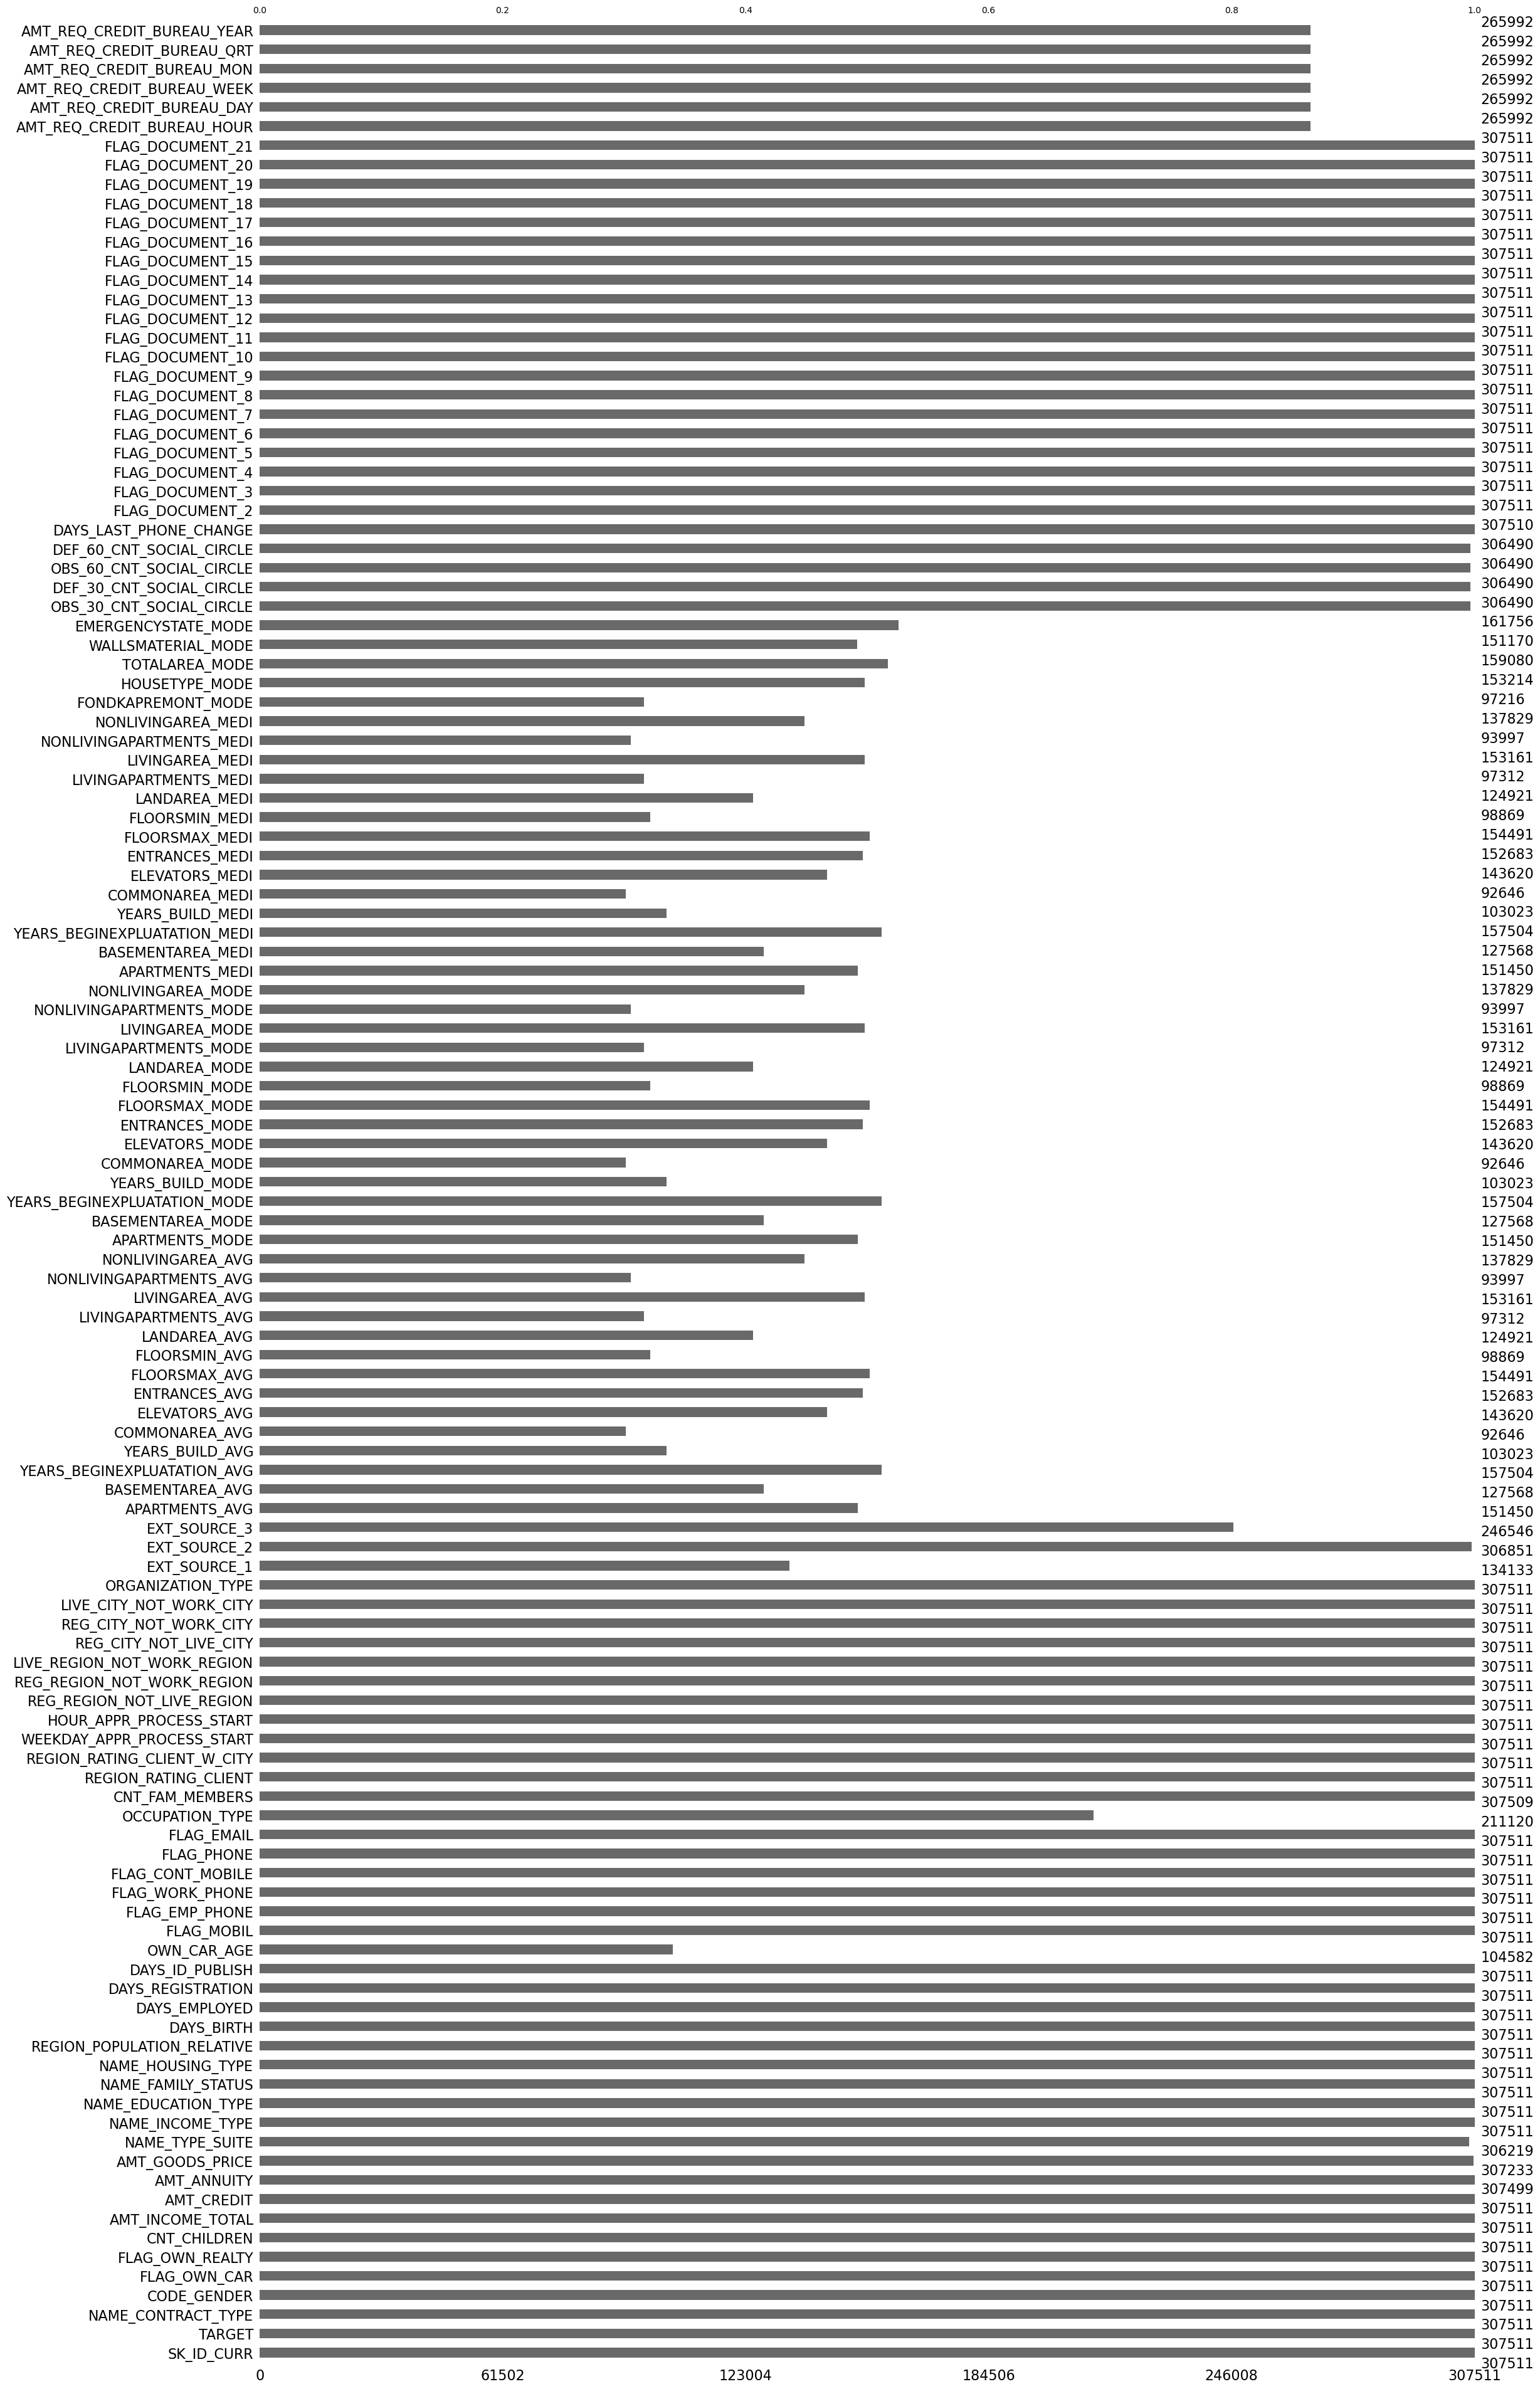

In [ ]:
msno.bar(df)

In [ ]:
# List of missing number only
not_missing_value = 0
missing_number = df.isnull().sum().sort_values(ascending=False)
missing_number_only = missing_number[ missing_number > not_missing_value]
print(f"The list of missing number only")
print(f"{missing_number_only}")


The list of missing number only
COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
EXT_SOURCE_2                   660
AMT_GOODS_PRICE                278
AMT_ANNUITY                     12
CNT_FAM_MEMBERS                  2
DAYS_LAST_PHONE_CHANGE           1
Length: 67, dtype: int64


In [ ]:
# Percentage of missing value
percentage = (missing_number/df.isnull().count()*100)
missing_data = pd.concat([missing_number, percentage],axis=1,keys=["Total","Percentage"])
print("Percentage of missing Values::")
print(round(missing_data, 2), "%")


Percentage of missing Values::
                           Total  Percentage
COMMONAREA_MEDI           214865       69.87
COMMONAREA_AVG            214865       69.87
COMMONAREA_MODE           214865       69.87
NONLIVINGAPARTMENTS_MODE  213514       69.43
NONLIVINGAPARTMENTS_AVG   213514       69.43
...                          ...         ...
NAME_HOUSING_TYPE              0        0.00
NAME_FAMILY_STATUS             0        0.00
NAME_EDUCATION_TYPE            0        0.00
NAME_INCOME_TYPE               0        0.00
SK_ID_CURR                     0        0.00

[122 rows x 2 columns] %


The table above shows the list of percentage of missing values in the dataset

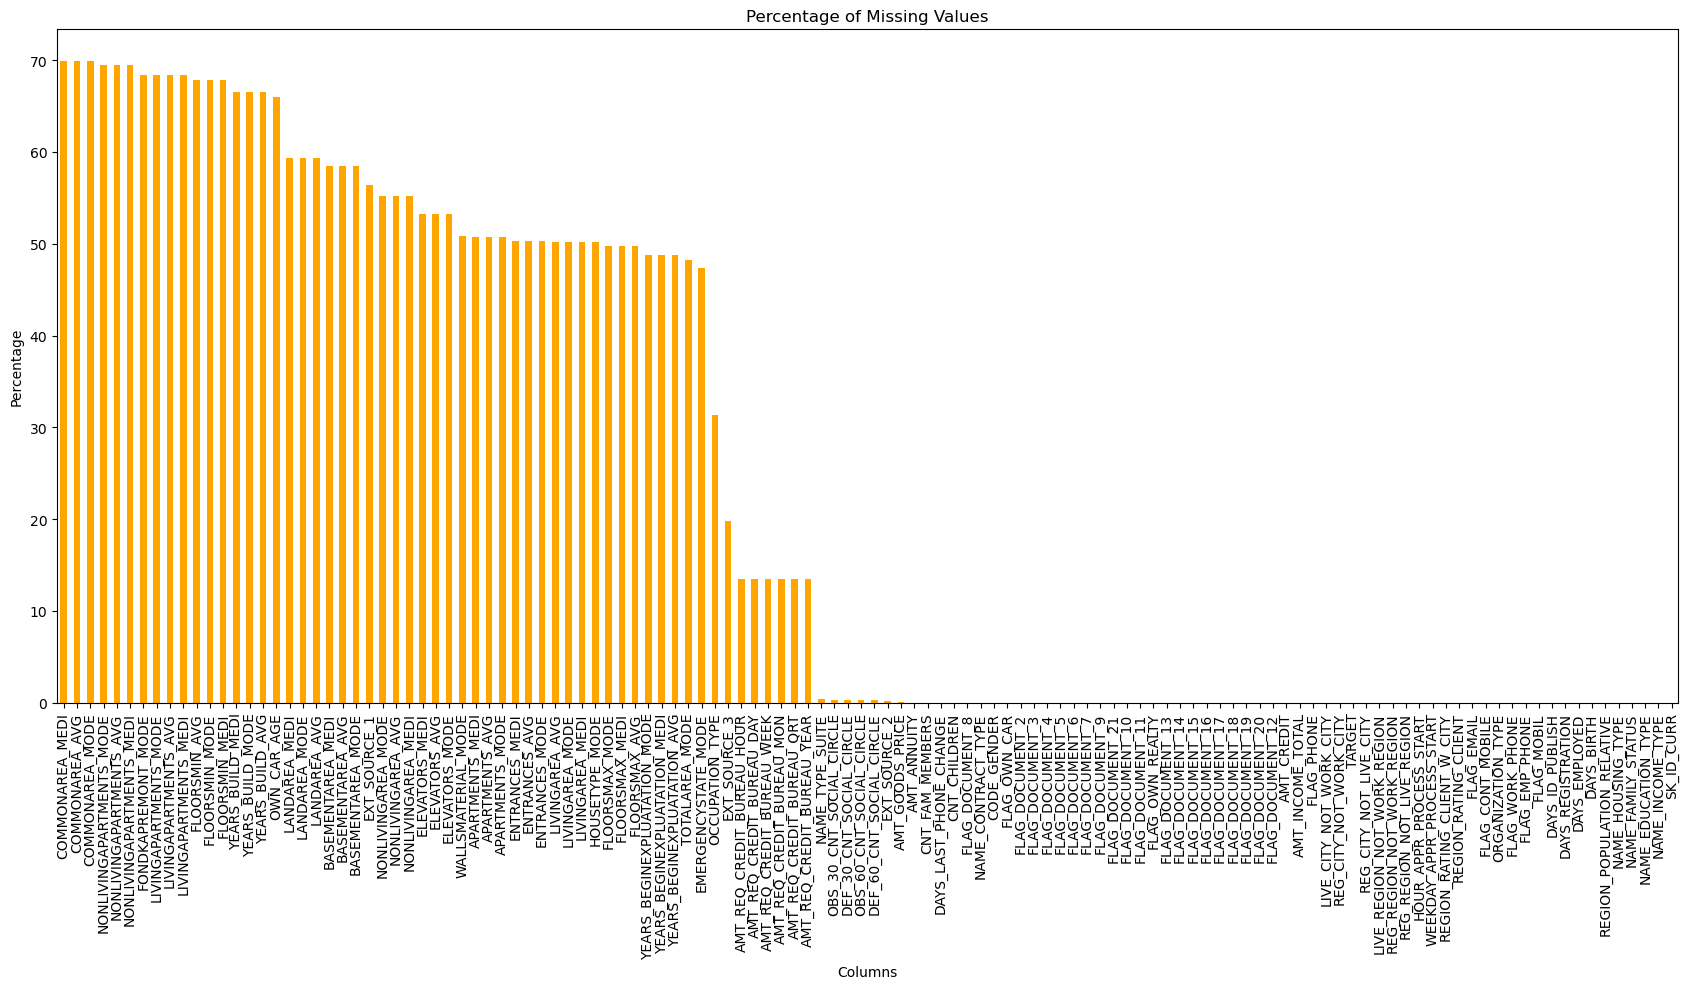

In [ ]:
# This shows a bar plot for the percentage of missing values

plt.figure(figsize=(17, 10))
missing_data['Percentage'].plot(kind='bar', color='Orange')
plt.title('Percentage of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()

The bar plot above shows the percentage of missing values in the dataset,The common areas how high percentage of missing information.

[Problem 3] Defining issues

* How is the income of client distrbuted ? Visualize the income distribution and identify the income group
* What is the distribution of loan approval status (target variable) ? How many loans were approved or denied?
* What is the correlation between the number of children and the credit amount of the loan? Does having more children affect the loan amount?
* What is the age of clients and how dowes it relate to repayment on time?
* what is the educational level of clients

### DISTRIBUTION OF CLIENT INCOME

In [ ]:
# Gets the list of column names with missing values
columns_with_missing_data = missing_number_only.index.tolist()

# Drop columns with missing values in the datasets
df2 = df.drop(columns=columns_with_missing_data)

# Display the DataFrame without columns with missing values
print("DataFrame without columns with missing values:")
df2

DataFrame without columns with missing values:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,Working,...,0,0,0,0,0,0,0,0,0,0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,Pensioner,...,0,0,0,0,0,0,0,0,0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,Working,...,0,0,0,0,0,0,0,0,0,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,Commercial associate,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

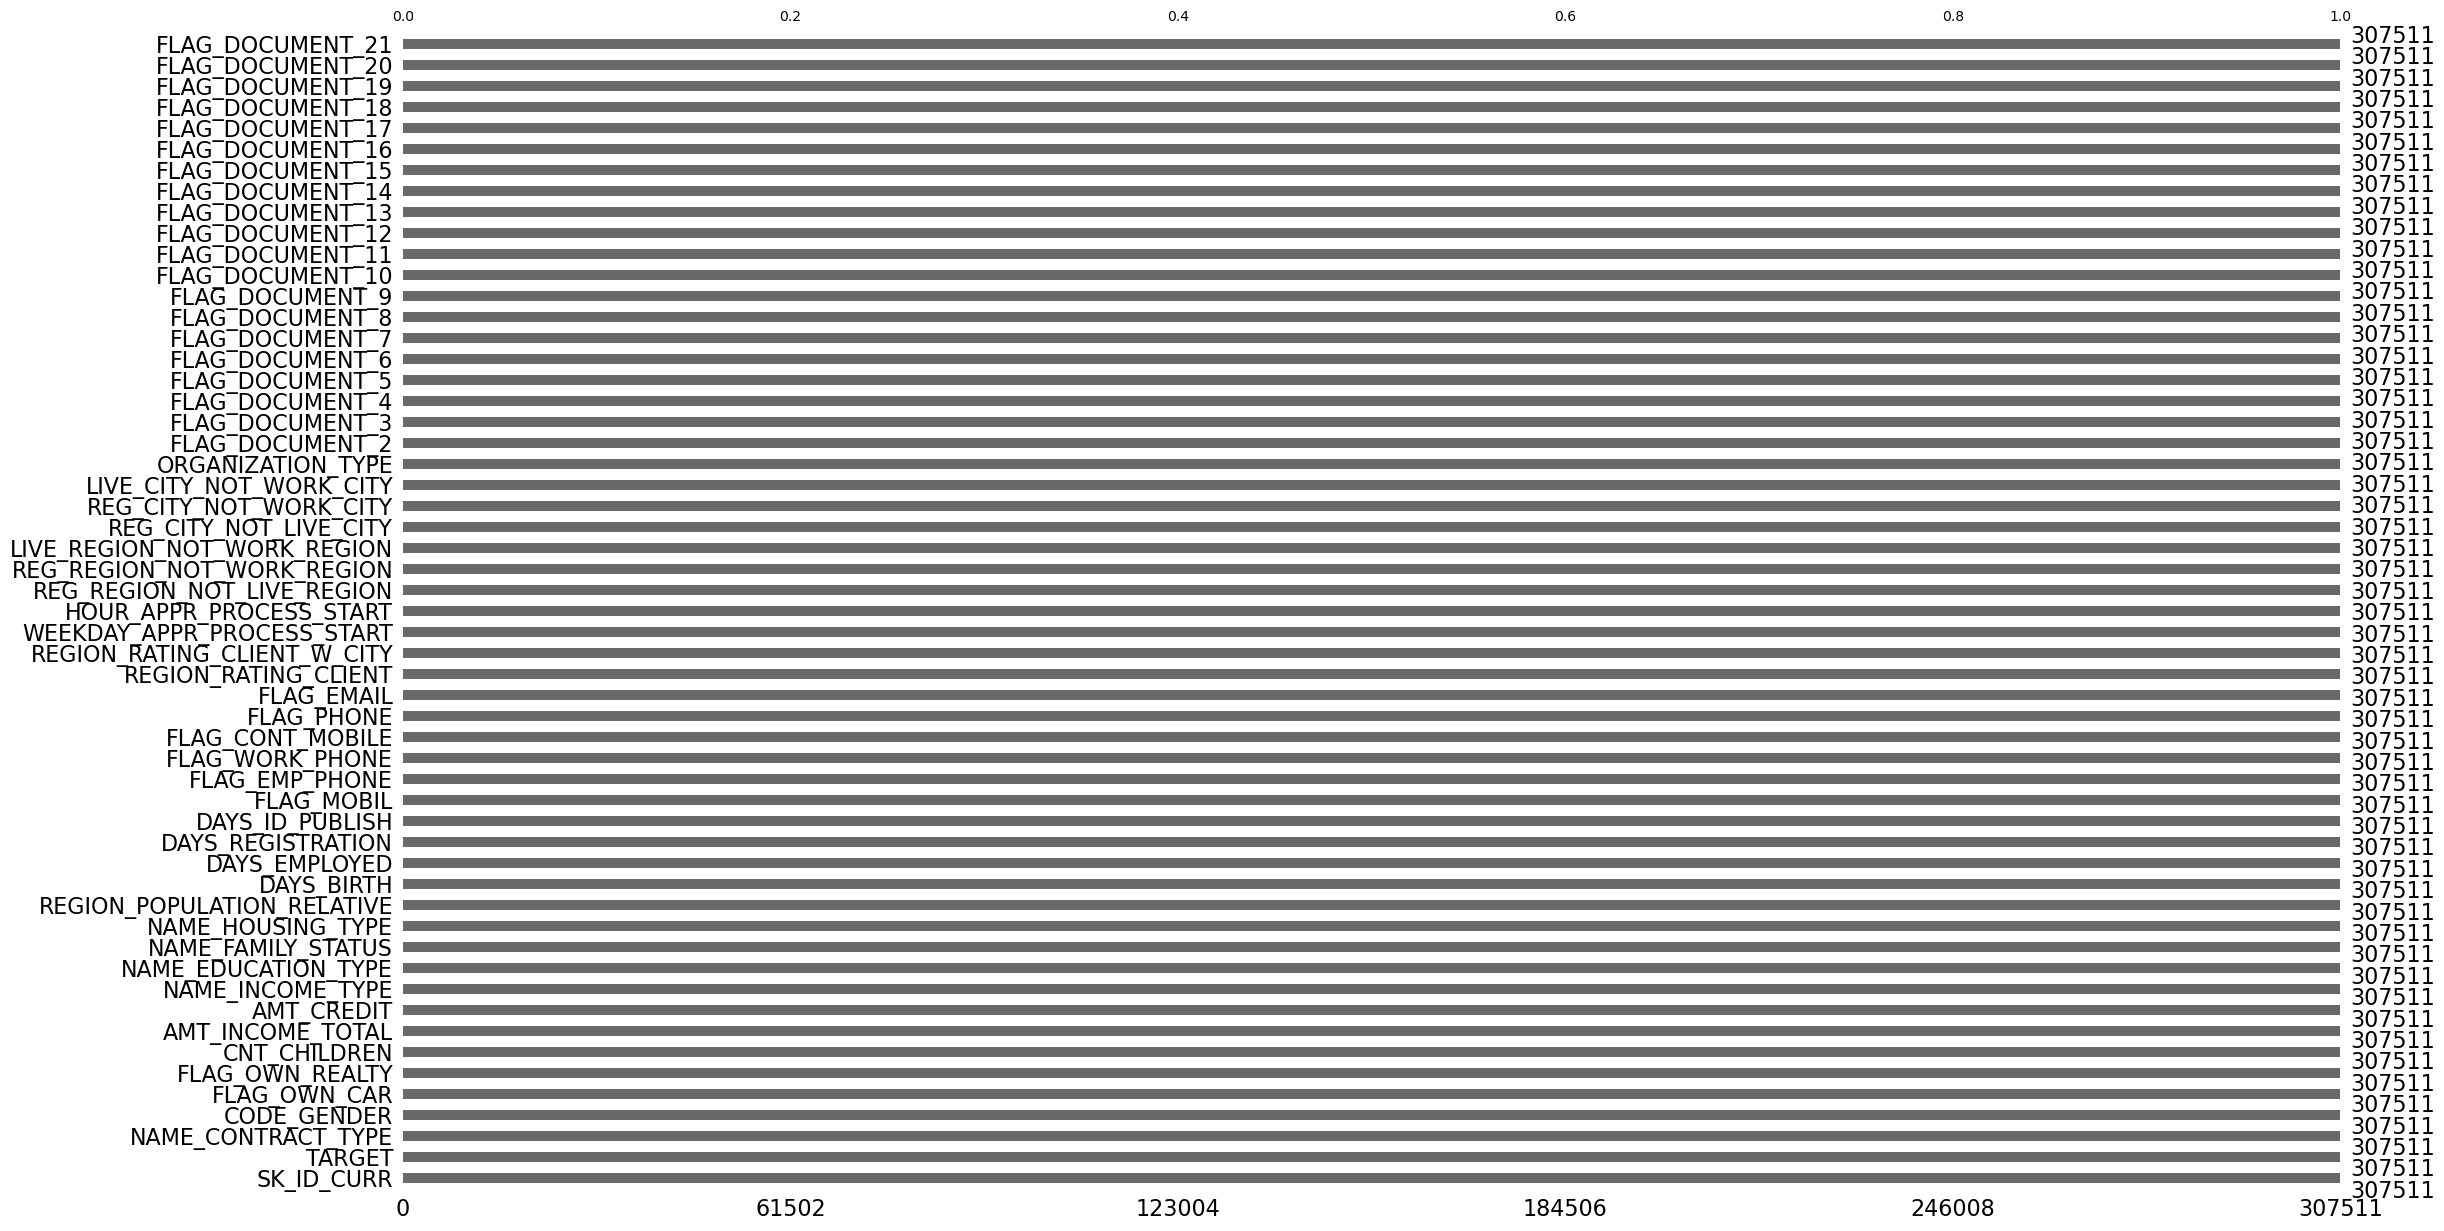

In [ ]:
msno.bar(df2)

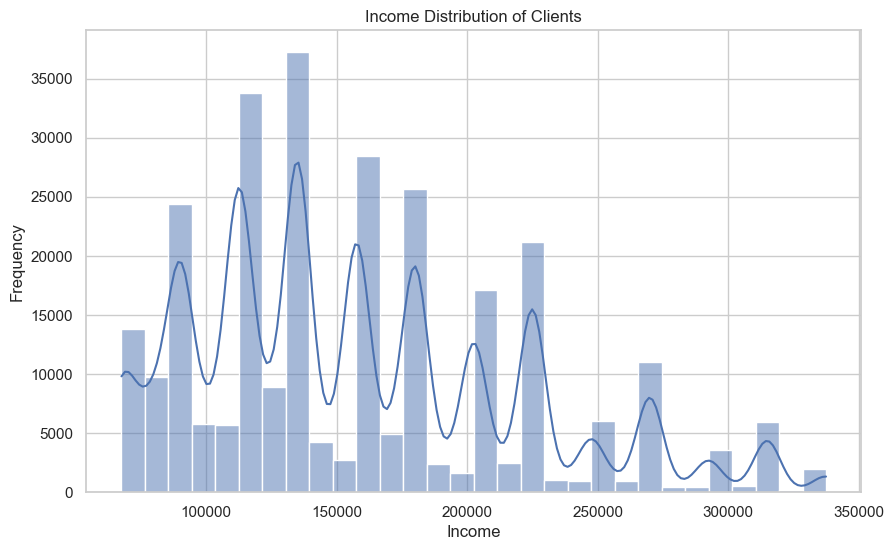

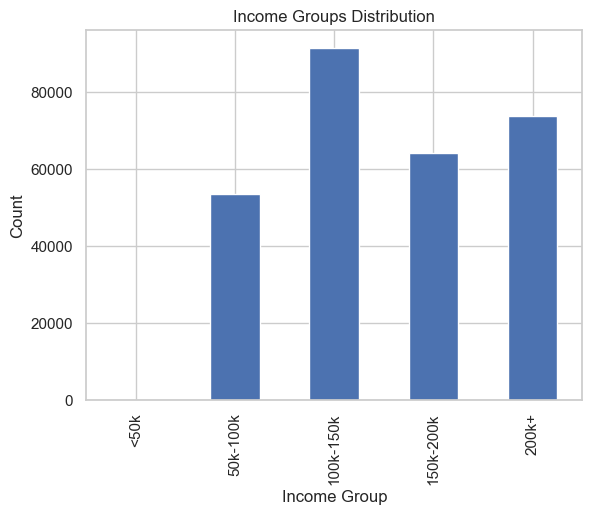

In [ ]:
income_data = df2['AMT_INCOME_TOTAL']

#Remove values beyond 95th percentile : This is done to remove any outlier in the dataset
income_data = income_data[(income_data >= income_data.quantile(0.05)) & (income_data <= income_data.quantile(0.95))]

plt.figure(figsize=(10, 6))
sns.histplot(income_data, bins=30, kde=True)
plt.title('Income Distribution of Clients')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()
income_groups = pd.cut(income_data, bins=[0, 50000, 100000, 150000, 200000, float('inf')], labels=['<50k', '50k-100k', '100k-150k', '150k-200k', '200k+'])
income_groups.value_counts().sort_index().plot(kind='bar')
plt.title('Income Groups Distribution')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.show()

The result plot shows the distribution of client's income and the kernel density estimate (kde) provides a smoothed representation of the distribution. You can identify income groups based on  peaks and patterns in the histogram.

### LOAN APPROVAL STATUS DISTRIBUTION

In [ ]:
payment_difficulties_counts = df2["TARGET"].value_counts()
table = pd.DataFrame({'TARGET Values': payment_difficulties_counts.index, 'Count': payment_difficulties_counts.values})
table

,TARGET Values,Count
0,0,282686
1,1,24825


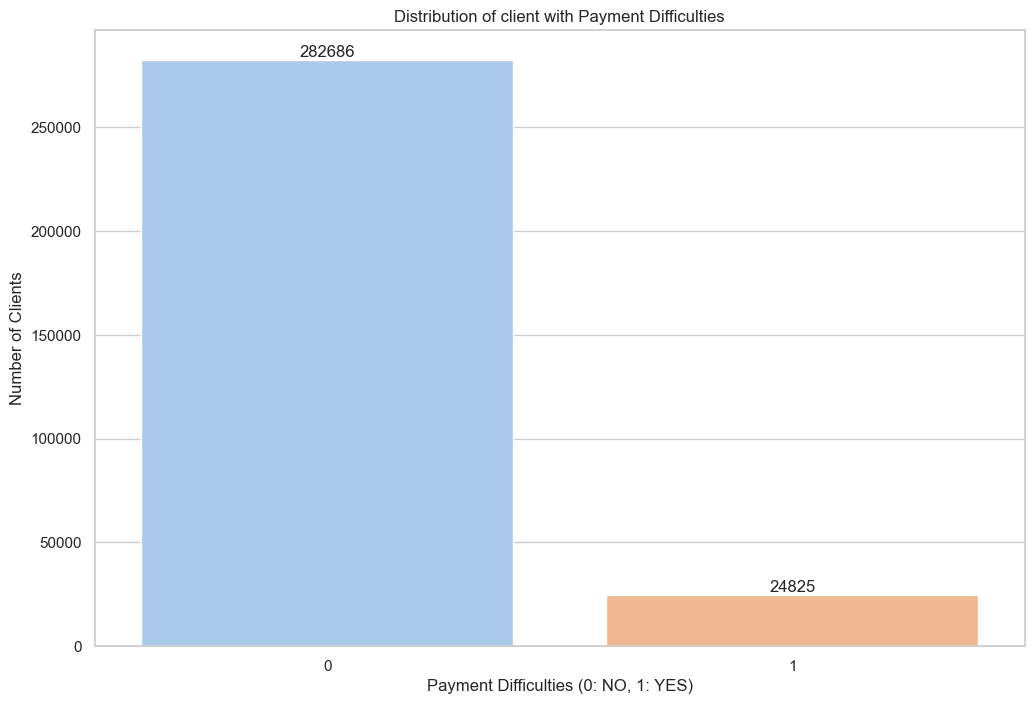

In [ ]:
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
sns.countplot(x="TARGET", data=df2, palette="pastel")
plt.title("Distribution of client with Payment Difficulties")
plt.xlabel("Payment Difficulties (0: NO, 1: YES)")
plt.ylabel("Number of Clients")
#Display the count above each bar

for index, value in payment_difficulties_counts.items():
    plt.text(index, value+0.1, str(value), ha="center", va="bottom")


plt.show()


This plot help to visualize the distribution of clients with payment difficulties based on the updated target and dataframe variable definitions.This proof that the data is an imbalance dataset

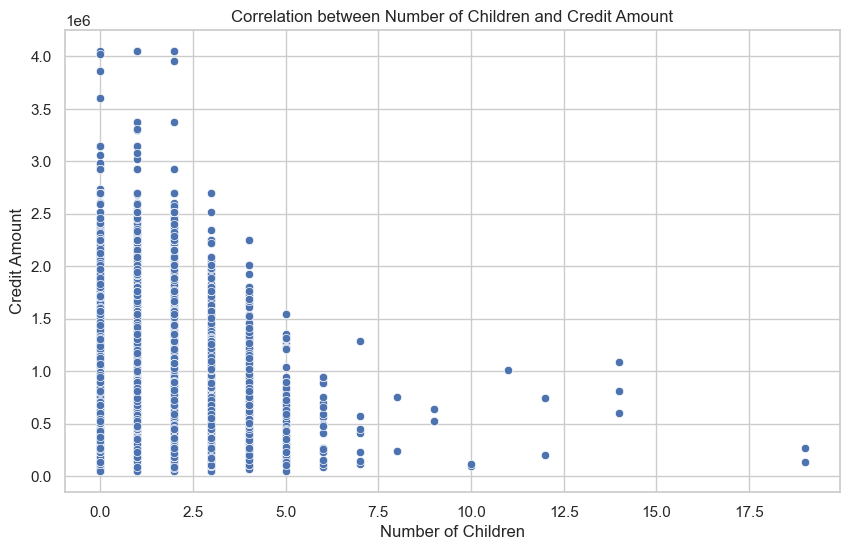

Correlation coefficient: 0.0021454434616763095


In [ ]:
selected_columns = ['CNT_CHILDREN', 'AMT_CREDIT']

data_subset = df2[selected_columns]

# Calculate correlation
correlation = data_subset.corr().loc['CNT_CHILDREN', 'AMT_CREDIT']

# Visualize the relationship with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CNT_CHILDREN', y='AMT_CREDIT', data=data_subset)
plt.title('Correlation between Number of Children and Credit Amount')
plt.xlabel('Number of Children')
plt.ylabel('Credit Amount')
plt.show()

# Display correlation coefficient
print(f"Correlation coefficient: {correlation}")

By analyzing the scatter plot and the correlation coefficient, there is a weak  very weak positive correlation between the number of children and the credit amount. There may be a slight tendency for the number of children to increase with the credit amount, the relationship is not strong.









In [ ]:
table_for_selected_columns = df2[selected_columns].copy()

# Display the new DataFrame
table_for_selected_columns

,CNT_CHILDREN,AMT_CREDIT
0,0,406597.5
1,0,1293502.5
2,0,135000.0
3,0,312682.5
4,0,513000.0
...,...,...
307506,0,254700.0
307507,0,269550.0
307508,0,677664.0
307509,0,370107.0


### The relationship between the age of clients and their repayment behavior

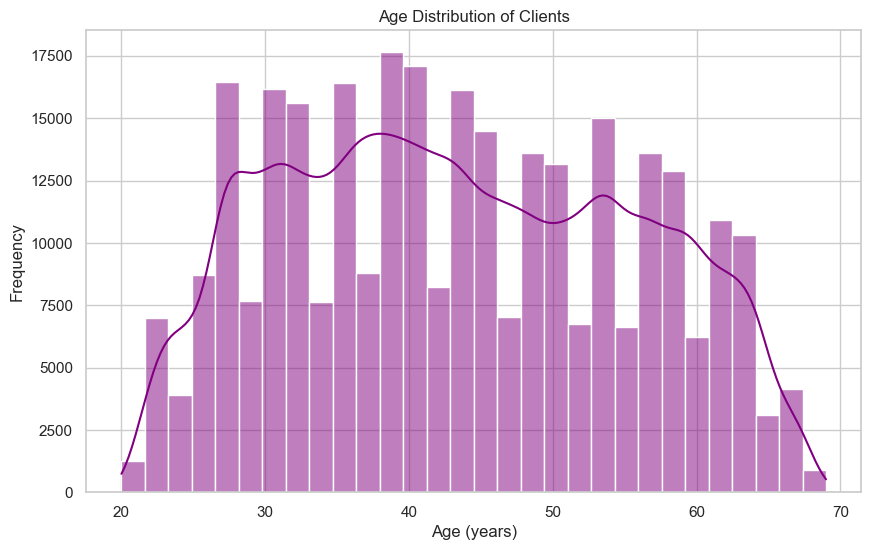

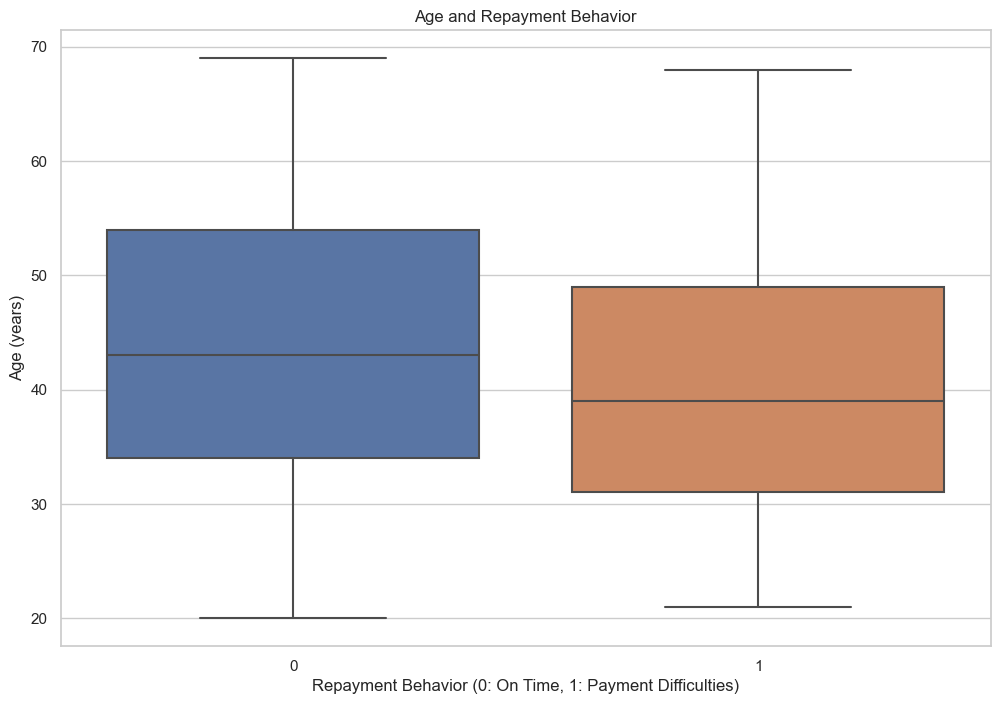

In [ ]:
selected_columns = ['DAYS_BIRTH', 'TARGET']
data_subset = df2[selected_columns].copy()

# Convert 'DAYS_BIRTH' to age in years
data_subset.loc[:, 'AGE'] = -data_subset['DAYS_BIRTH'] // 365
#In financial datasets, the 'DAYS_BIRTH' column conventionally uses negative values to indicate the number of days in the past relative to a reference date.
#By applying the negative sign, It convert the negative days to positive days, making the calculation correct when dividing by 365 to obtain the age in years.

# Visualize the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(data_subset['AGE'], bins=30, kde=True, color="Purple")
plt.title('Age Distribution of Clients')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()

# Visualize the relationship between age and repayment behavior
plt.figure(figsize=(12, 8))
sns.boxplot(x='TARGET', y='AGE', data=data_subset)
plt.title('Age and Repayment Behavior')
plt.xlabel('Repayment Behavior (0: On Time, 1: Payment Difficulties)')
plt.ylabel('Age (years)')
plt.show()

With the aid of the box plot above, the central tendency, spread, and potential outliers in the distribution of age for clients who repaid on time (0) and those who had payment difficulties (1) can be observed. This can help understand if there's a notable difference in the age distribution between the two groups.

### EDUCATIONAL LEVEL OF CLIENT

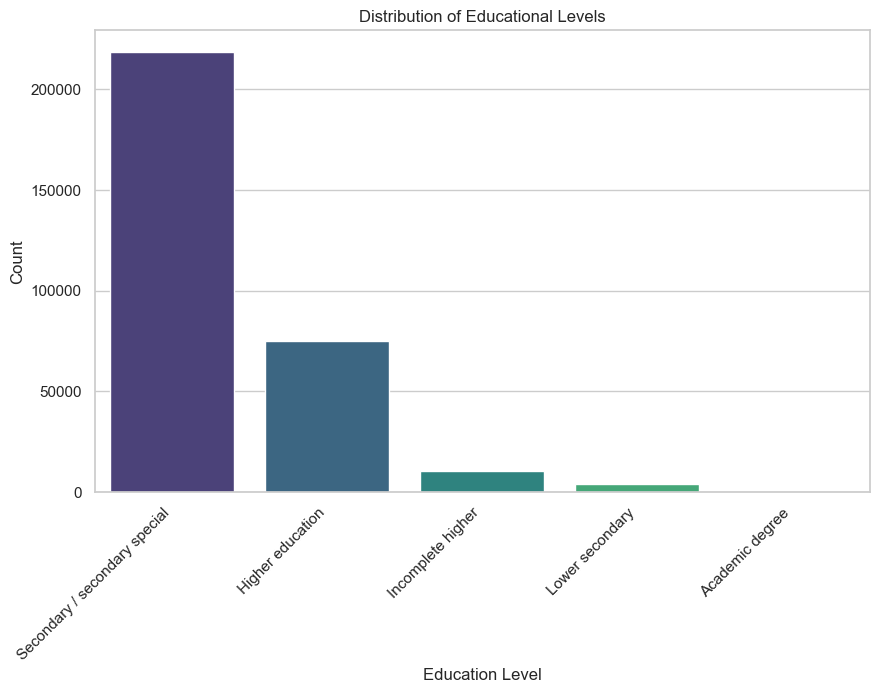

In [ ]:
# Select the 'NAME_EDUCATION_TYPE' column
education_data = df2['NAME_EDUCATION_TYPE']

# Count the occurrences of each education level
education_counts = education_data.value_counts()

# Visualize the distribution of educational levels
plt.figure(figsize=(10, 6))
sns.barplot(x=education_counts.index, y=education_counts.values, palette='viridis') # the palette set the color palette for the visualizations
plt.title('Distribution of Educational Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')# allows to see clearly,it rotate the x-axis labels
plt.show()

### TABLE FOR THE EDUCATION COUNT

In [ ]:
education_data = df2['NAME_EDUCATION_TYPE']

# Count the occurrences of each education level
education_counts = education_data.value_counts()

# Create a DataFrame from the counts
education_table = pd.DataFrame({'Education Level': education_counts.index, 'Count': education_counts.values})

education_table

,Education Level,Count
0,Secondary / secondary special,218391
1,Higher education,74863
2,Incomplete higher,10277
3,Lower secondary,3816
4,Academic degree,164


The clients with secondary/Secondary special has the highest frequency in terms of education level counts and the above table and bar plot can be used to visualize for better information.